In [130]:
%run ../Emulator.ipynb
%run ../Clusterer.ipynb
%run ../Observer.ipynb
%run ../Statistician.ipynb

# Emulate I

We instantiate the Emulator. We take the already-trained pixelwise emulator from a table.

In [180]:
a_initial = Emulator(
    region=[-35, -30, -20, -15], #[-45, 40, -30, 10],
    start_time="2017-07-01T10:00:00",
    end_time="2017-07-01T11:59:59"
)

myFeaturesNames = [
    "bparam",
    "acure_autoconv_exp_nd",
    "a_ent_1_rp",
    "acure_dry_dep_acc",
    "acure_dry_dep_ait",
    "acure_dry_dep_so2",
    "acure_bvoc_soa",
    "acure_dms",
    "acure_bl_nuc",
    "acure_ait_width",
    "acure_cloud_ph",
    "dbsdtbs_turb_0",
    "acure_bc_ri",
    "acure_sea_spray",
    "acure_carb_bb_diam",
    "acure_anth_so2_r",
    "acure_prim_so4_diam"
]

a = Emulator(
    region=[-45, 40, -30, 10], #[-45, 40, -30, 10],
    excludeFeats=list(set(a_initial.__get_input_names__()) - set(myFeaturesNames)),
    nu=0.5,
    start_time="2017-07-01T09:00:00",
    end_time="2017-07-01T14:59:59",
    centerTarget=True
)

In [181]:
with open("length_scale_tables/2017-07-02T09:00:00_2017-07-02T13:59:59", "r") as f:
    lengthScales = pd.read_csv(f, index_col=0)

lengthScales

,acure_bl_nuc,acure_ait_width,acure_cloud_ph,acure_carb_bb_diam,acure_prim_so4_diam,acure_sea_spray,acure_anth_so2_r,acure_bvoc_soa,acure_dms,acure_dry_dep_ait,...,acure_dry_dep_so2,acure_bc_ri,bparam,acure_autoconv_exp_nd,dbsdtbs_turb_0,a_ent_1_rp,modelId,latitude,longitude,time
0,8.743120,7379.285390,73.815416,9430.520011,4.270812,5.046454,41.675354,7.730324,21.525117,9.443253,...,15.276279,13.835263,49.398663,6144.873808,7305.000006,21.430925,d433e1d7-85d1-4e65-b966-c927aa4f24af,-0.625,-0.9375,2017-07-02 09:20:00
1,8.971716,6103.090269,1526.913394,3474.828135,4.572463,4.957138,36.068432,8.605111,25.222292,9.486972,...,15.490021,13.269274,4465.745226,11622.306627,8614.138701,39.144121,66e2f63c-e435-4101-8526-01d8bb567e29,-0.625,-0.9375,2017-07-02 12:20:00
2,22.630119,23824.792660,39551.977650,100000.000000,4.297980,3.129459,19.583359,14.226367,8.008608,634.259621,...,24.169135,13.166935,57.113985,38809.639541,31.554581,35.743620,71abd87a-54d4-4ff8-86d2-02db2c30eff0,-0.625,-10.3125,2017-07-02 09:20:00
3,25.752733,15084.401882,10460.921402,15466.969098,5.044275,3.836928,21.899679,17.530407,9.908933,19720.055920,...,27.682041,17.208884,29.581111,51418.761811,33.255543,39.373759,30fbf078-2cb6-465f-9581-b1b6731d8130,-0.625,-10.3125,2017-07-02 12:20:00
4,30.458331,16.520271,3724.504202,1064.514628,3.360794,3.008072,16.324497,19.586456,8.802024,16.349529,...,21.071381,21.350049,83.591438,1306.031685,35.480890,27.381130,47eb71ac-d45d-4d46-bd68-8064dba21148,-0.625,-12.1875,2017-07-02 09:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,14604.975299,256.666964,227.487350,13254.496008,36.514764,11.035156,232.244249,232.618710,133.809723,24046.513197,...,105.808540,188.038465,100000.000000,100000.000000,60.863133,29.783373,0e2799d3-90d0-4114-a473-a3f4f39ee594,-20.625,4.6875,2017-07-02 12:20:00
2876,21180.932972,96.577431,177.360937,2246.230011,21.642627,7.954890,125.857190,80.169010,67.308412,9902.363225,...,68.937024,35.863893,21354.969660,10142.831978,15.540763,86.663633,66e81150-fb75-42e5-9089-66fbaf8c4854,-20.625,6.5625,2017-07-02 09:20:00
2877,276.991422,137.990691,252.233702,176.169574,27.692524,9.860842,191.182932,120.427976,102.429443,100000.000000,...,37.026060,195.971012,87613.503155,54265.444333,57.785982,82.039062,00d90707-2b9b-4bd0-93ea-d366a1de19e3,-20.625,6.5625,2017-07-02 12:20:00
2878,29.077378,305.042631,21645.312953,241.882730,34627.361102,8.215416,48.736182,233.341808,119.516168,100000.000000,...,192.072276,22286.939078,57.077665,50.502107,59.984513,40.152107,4abae11f-308e-4bf8-aea7-7e1fe1821e13,-20.625,8.4375,2017-07-02 09:20:00


# Select

We perform the clustering procedure to define regions.

In [182]:
b = Clusterer(a, lengthScales=lengthScales)

In [183]:
my_lengthscales = b.lengthscales
my_points = b.lengthscales.loc[:, ["latitude", "longitude"]]

In [188]:
from sklearn.cluster import KMeans

"""
from sklearn import preprocessing

x = my_points.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
my_points = pd.DataFrame(x_scaled)

my_points.latitude = my_points.latitude / (0.9375*2)
my_points.longitude = my_points.longitude / (0.625*2)
my_points.time = my_points.time / 3
"""


my_k_means = KMeans(n_clusters=100).fit(my_points)

In [189]:
my_lengthscales['region'] = my_k_means.predict(my_points)
my_lengthscales = my_lengthscales.sort_values('region').reset_index(drop=True)
b.labels = np.array(my_lengthscales['region'])
my_labels = b.labels

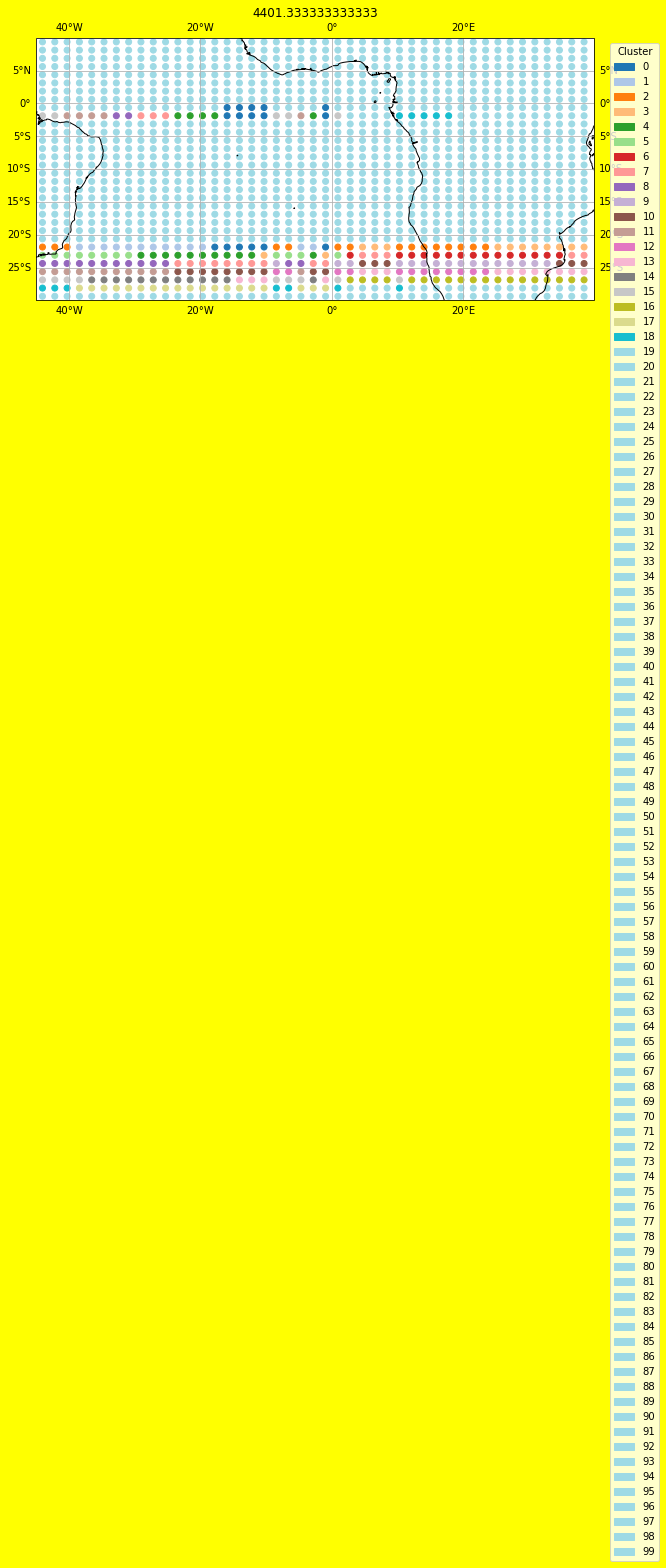

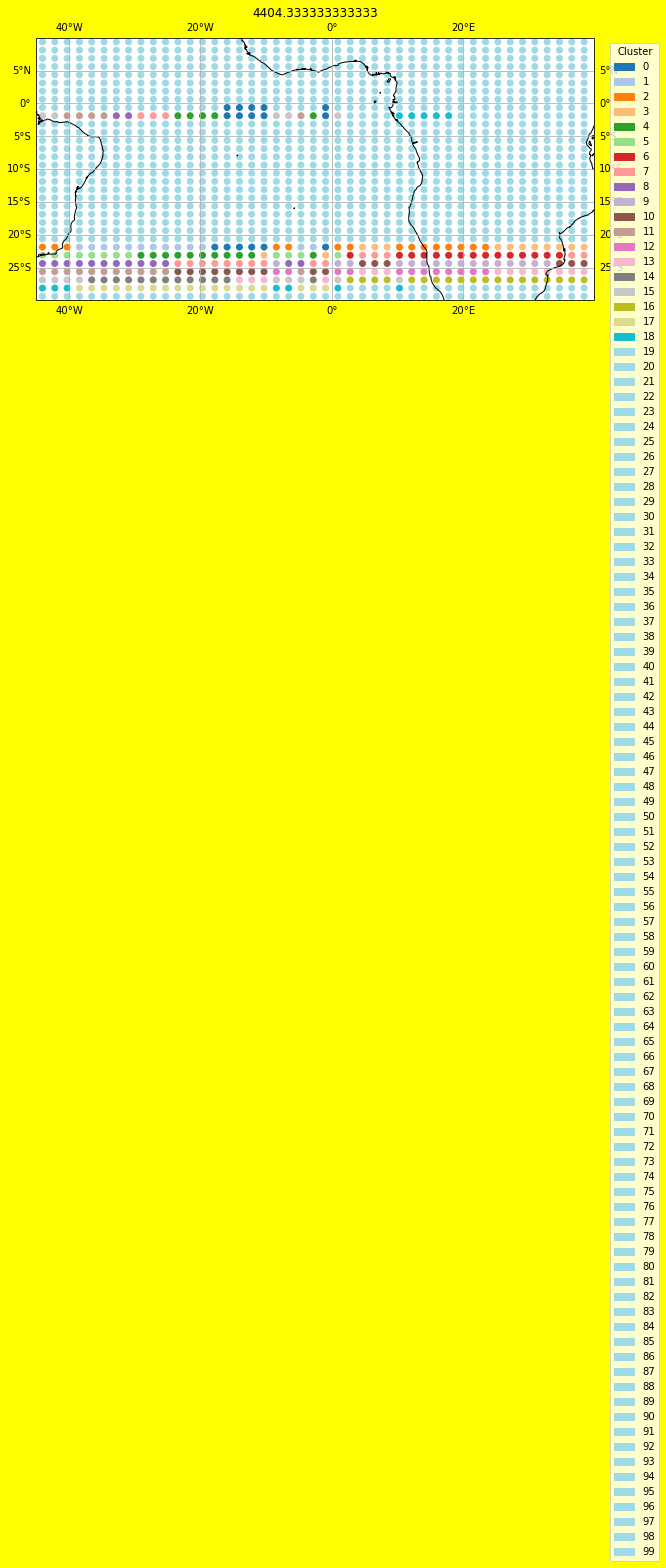

In [190]:
b.plot_clusters('')

In [191]:
np.unique(my_labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int32),
 array([32, 26, 30, 26, 32, 24, 30, 36, 30, 32, 32, 34, 24, 30, 26, 28, 38,
        38, 24, 30, 20, 28, 36, 32, 36, 30, 36, 30, 30, 24, 26, 30, 36, 30,
        20, 24, 30, 30, 28, 26, 26, 26, 30, 26, 24, 30, 34, 32, 32, 28, 36,
        36, 24, 38, 32, 28, 32, 38, 26, 24, 22, 36, 24, 32, 32, 26, 28, 30,
        30, 28, 32, 22, 30, 26, 28, 30, 24, 26, 32, 38, 22, 28, 28, 30, 26,
        28, 28, 26, 24, 24, 26, 22, 24, 26, 20, 32, 26, 28, 26, 24]))

# Emulate II

We obtain emulators now for each cluster / region.

In [192]:
model_training_actions = a.train(
    pixelwise=False,
    lengthScales=my_lengthscales,
    labels=my_labels
)

In [200]:
for emu in model_training_actions.values():
    print(emu.hasCompleted())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
False
True
True
False
True
True
True
True
True
False
False
True
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [111]:
model_training_actions

{'regionalEmulator0': c3.AsyncAction(
 typeName='GaussianProcessRegressionPipe',
 actionName='trainWithListOfAODModels',
 args=c3.Mapp<string, any>({'excludeFeatures': [],
        'modelIds': ['ace0e79d-617e-473d-8a81-0e6eb67d73d1',
                     'b460eaa8-1bf2-42e1-9a23-6bea1112f715',
                     '0a9c1f79-eb56-4fc3-a1d9-3aa3bdea7a3e',
                     'eeb30736-0039-402e-aa60-35a4f1943fc8',
                     'ae3f8ab1-1e20-4250-a447-2812a1c3baa1',
                     '1e261dd6-2491-4c07-bb79-2bf6092f8c82',
                     '0d9277db-9c96-49b6-a19d-317661c0bd51',
                     '91463ab2-5cf5-4110-91ec-9c59b5f92417',
                     'fd95d2b9-3501-4ef7-a336-7d75c07dc6c2',
                     '6211043a-b654-4bb0-bcea-f80d43c7f35c',
                     'ff0abcf1-61bd-464d-b132-49fc719ac588',
                     '5e1454aa-2dee-452c-8f12-bb67868ed662'],
        'this': c3.GaussianProcessRegressionPipe(
                 id='regionalEmulator0',
    

In [112]:
regional_emulators_models = a.fetch_regional_emulators(model_training_actions)

In [113]:
regional_emulators_models

{0: c3.GaussianProcessRegressionPipe(
 id='regionalEmulator0',
 meta=c3.Meta(
        tenantTagId=151,
        tenant='dev',
        tag='tc02d',
        created=datetime.datetime(2022, 11, 4, 4, 6, 20, tzinfo=datetime.timezone.utc),
        createdBy='jcarzon@andrew.cmu.edu',
        updated=datetime.datetime(2022, 11, 4, 5, 18, 26, tzinfo=datetime.timezone.utc),
        updatedBy='jcarzon@andrew.cmu.edu',
        timestamp=datetime.datetime(2022, 11, 4, 5, 18, 26, tzinfo=datetime.timezone.utc),
        fetchInclude='[]',
        fetchType='GaussianProcessRegressionPipe'),
 version=3,
 typeIdent='PIPE:LF:GPREG',
 noTrainScore=False,
 persistedModelCategory='unidentified',
 untrainableOverride=False,
 technique=c3.GaussianProcessRegressionTechnique(
             id='COE4',
             centerTarget=False,
             validation=False,
             randomSeed=42,
             splitFraction=0.2),
 trainedModel=c3.MLTrainedModelArtifact(
                model='eJzsvcdTllv074kKSFAUBFFAVHI

## Try emulating

In [52]:
queryVariant = pd.DataFrame(d.__get_random_model_variants__(nVariants=1)[0]).transpose()
queryVariant

NameError: name 'd' is not defined

In [53]:
preds = a.emulate_variant(
    regional_emulators_models,
    queryVariant,
    pixelwise=False,
    lengthScales=my_lengthscales,
    labels=my_labels
)

NameError: name 'queryVariant' is not defined

In [298]:
preds

,latitude,longitude,time,acure_dry_dep_acc,acure_bl_nuc,acure_carb_bb_diam,acure_dms,dbsdtbs_turb_0,acure_sea_spray,acure_autoconv_exp_nd,...,3,4,5,6,7,8,9,10,11,12
0,-21.875,-44.0625,4401.333333,0.908112,0.083642,0.255551,0.699536,0.275966,0.903048,0.562172,...,0.275194,0.281707,0.277989,0.269271,0.274320,0.275690,0.274320,0.285475,0.275690,0.289293
1,-20.625,-44.0625,4401.333333,0.908112,0.083642,0.255551,0.699536,0.275966,0.903048,0.562172,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-21.875,-42.1875,4401.333333,0.908112,0.083642,0.255551,0.699536,0.275966,0.903048,0.562172,...,0.275690,0.285475,0.281707,0.271761,0.277989,0.275194,0.277989,0.289293,0.275194,0.285475
3,-20.625,-42.1875,4401.333333,0.908112,0.083642,0.255551,0.699536,0.275966,0.903048,0.562172,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-20.625,-40.3125,4401.333333,0.908112,0.083642,0.255551,0.699536,0.275966,0.903048,0.562172,...,0.275194,0.289293,0.285475,0.273810,0.281707,0.273809,0.281707,0.285475,0.273810,0.281707
5,-20.625,-38.4375,4401.333333,0.908112,0.083642,0.255551,0.699536,0.275966,0.903048,0.562172,...,0.273810,0.285475,0.289293,0.275194,0.285475,0.271761,0.285475,0.281707,0.271761,0.277989
6,-21.875,-36.5625,4401.333333,0.908112,0.083642,0.255551,0.699536,0.275966,0.903048,0.562172,...,0.271761,0.281707,0.285475,0.275690,0.289263,0.269271,0.289293,0.277989,0.269271,0.274320
7,-20.625,-36.5625,4401.333333,0.908112,0.083642,0.255551,0.699536,0.275966,0.903048,0.562172,...,0.271761,0.281707,0.285475,0.275690,0.289293,0.269271,0.289263,0.277989,0.269271,0.274320
8,-23.125,-44.0625,4404.333333,0.908112,0.083642,0.255551,0.699536,0.275966,0.903048,0.562172,...,0.285475,0.273809,0.271761,0.274320,0.269271,0.289293,0.269271,0.275194,0.289263,0.275690
9,-21.875,-44.0625,4404.333333,0.908112,0.083642,0.255551,0.699536,0.275966,0.903048,0.562172,...,0.285475,0.273810,0.271761,0.274320,0.269271,0.289263,0.269271,0.275194,0.289293,0.275690


In [299]:
preds.response

0     0.195650
1     0.153966
2     0.195650
3     0.153966
4     0.195650
5     0.195650
6     0.195650
7     0.195650
8     0.195650
9     0.195650
10    0.153966
11    0.195650
12    0.195650
Name: response, dtype: float64

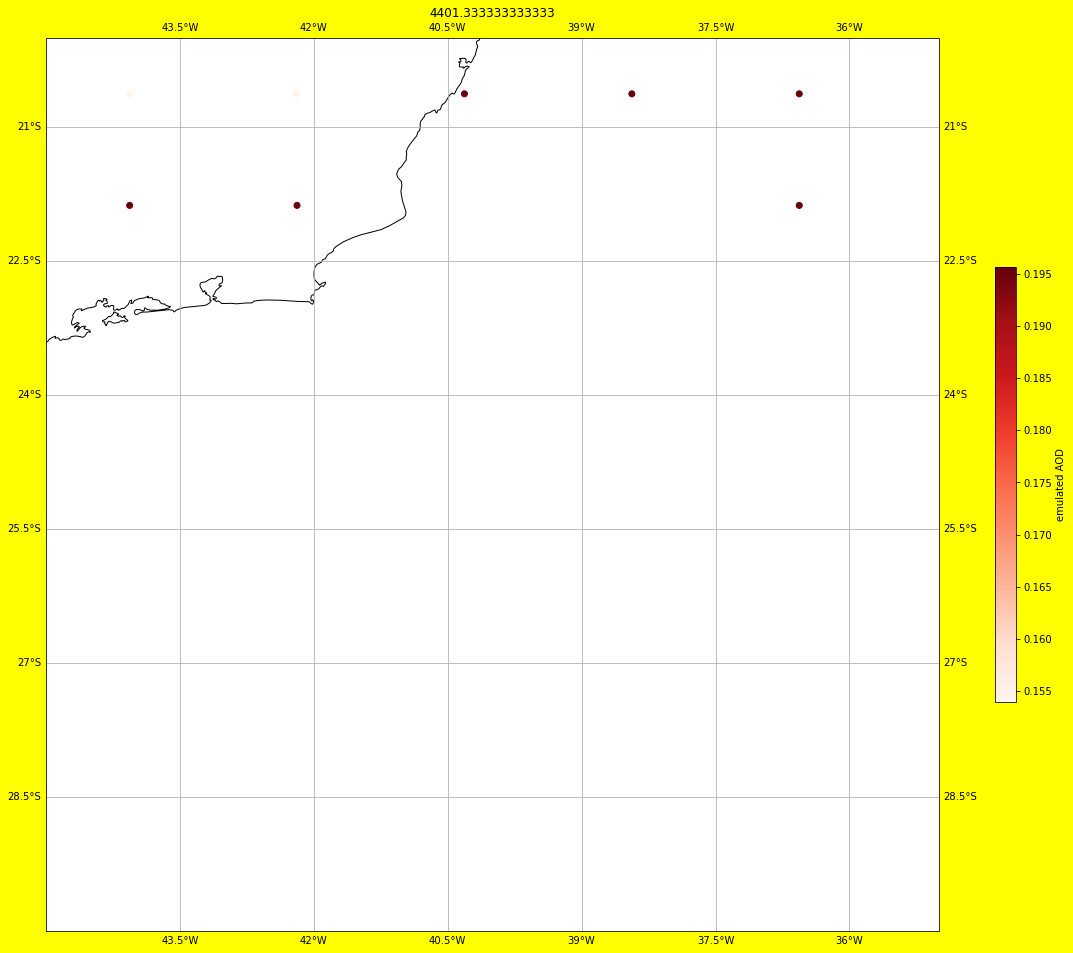

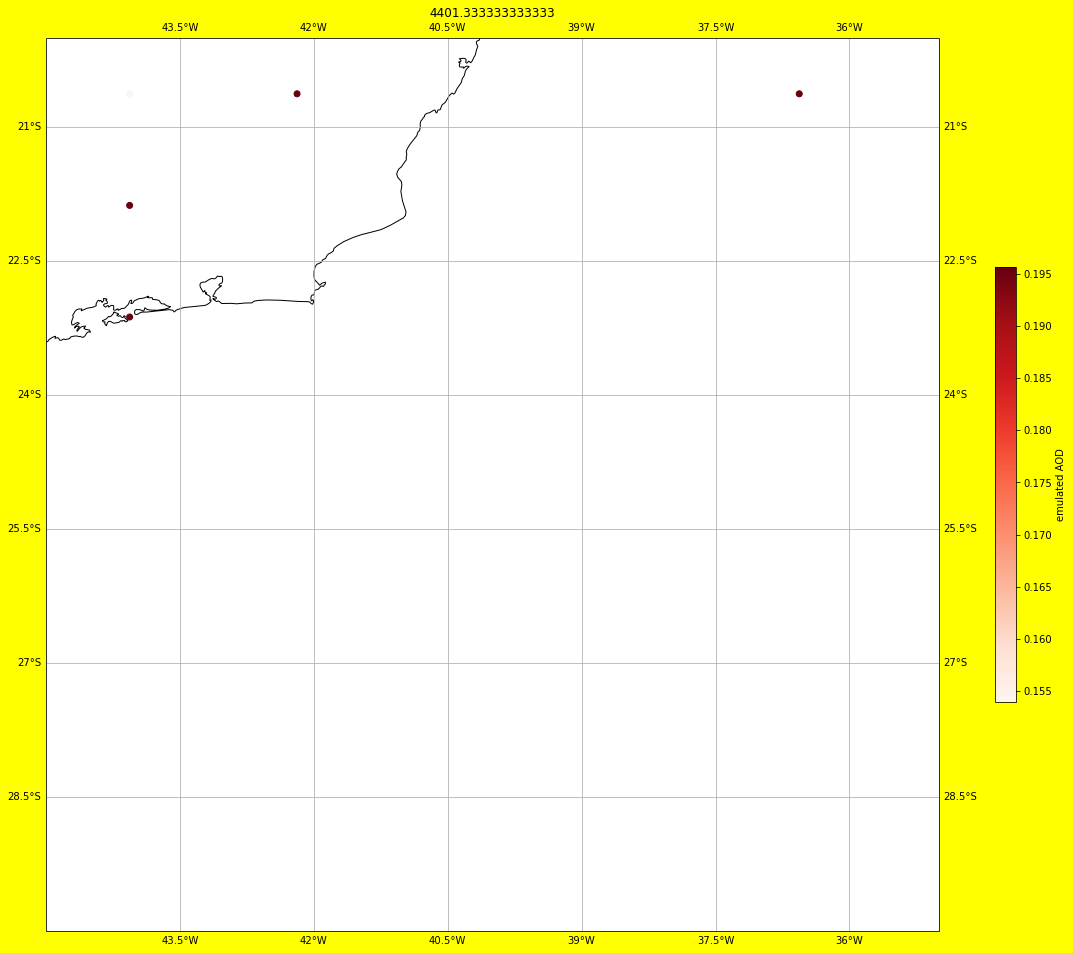

In [300]:
a.plot_variant(preds)

## Develop

In [100]:
len(a.inputs)

17

In [184]:
model_ids = list(b.lengthscales.loc[b.labels==0, "modelId"])
model_ids

['41f0642b-375d-477f-b847-9c619ee6ef05',
 '5431c2ad-78b4-45cc-bfc2-ca109b4911f6',
 '39c2154c-88f5-43dd-9037-a07c91879bdf',
 'f301cb2e-786f-47f5-b809-248d719a01a9',
 '0b31b9f7-1790-4023-ace3-c2c8f712dda8',
 '845930cd-9344-4d23-9e8c-9c6b420fba66',
 '2d1a3688-15df-45c5-bdcd-806ca1c1911c',
 'a2ed7407-682f-43fb-821b-ca3ab6f48d50',
 'f226a450-eee0-4eae-98c3-f4d518d0ece4',
 'b817fa0f-006a-4730-bebe-a4217dca99bc']

In [185]:
kernelLen = 20
GPR_kernel = c3.SklearnGPRKernelMatern(lengthScale=[1.0]*kernelLen, nu=0.5, coefficient=1.0).build().kernel.upsert()

GPR_technique = c3.GaussianProcessRegressionTechnique(
    randomState=42,
    kernel=GPR_kernel,
    centerTarget=True
).upsert()

GPR_dataspec = c3.GPRDataSourceSpec(
).upsert()

GPR_pipe = c3.GaussianProcessRegressionPipe(
    technique=GPR_technique,
    id="trial3"
)

In [186]:
# action spec
spec = c3.AsyncActionSpec(
    typeName="GaussianProcessRegressionPipe",
    action="trainWithListOfAODModels",
    args={
        "modelIds": model_ids,
        "excludeFeatures": [],
        "this": GPR_pipe.toJson()
    }
)

In [187]:
# submit action
action = c3.AsyncAction.submit(spec)

In [193]:
action.hasCompleted()

True

In [229]:
trained = c3.GaussianProcessRegressionPipe.get("regionalEmulator2.0")

In [230]:
trained

c3.GaussianProcessRegressionPipe(
 id='regionalEmulator2.0',
 meta=c3.Meta(
        tenantTagId=151,
        tenant='dev',
        tag='tc02d',
        created=datetime.datetime(2022, 11, 3, 18, 56, 50, tzinfo=datetime.timezone.utc),
        createdBy='jcarzon@andrew.cmu.edu',
        updated=datetime.datetime(2022, 11, 4, 1, 45, 38, tzinfo=datetime.timezone.utc),
        updatedBy='jcarzon@andrew.cmu.edu',
        timestamp=datetime.datetime(2022, 11, 4, 1, 45, 38, tzinfo=datetime.timezone.utc),
        fetchInclude='[]',
        fetchType='GaussianProcessRegressionPipe'),
 version=5,
 typeIdent='PIPE:LF:GPREG',
 noTrainScore=False,
 persistedModelCategory='unidentified',
 untrainableOverride=False,
 technique=c3.GaussianProcessRegressionTechnique(
             id='COEY',
             centerTarget=False,
             validation=False,
             randomSeed=42,
             splitFraction=0.2),
 trainedModel=c3.MLTrainedModelArtifact(
                model='eJzsvddTlV/XLYgJBEwoQVFJgoA

In [197]:
queryVariant = pd.DataFrame(d.__get_random_model_variants__(nVariants=1)[0]).transpose()
queryVariant

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.65392,0.896086,0.574654,0.758367,0.088352,0.30463,0.274014,0.283052,0.060985,0.560894,0.159467,0.630413,0.5014,0.811083,0.679133,0.269257,0.202373


In [203]:
mods = {0.0: trained}

In [206]:
b.lengthscales.loc[b.labels==0, :]

,acure_bl_nuc,acure_ait_width,acure_cloud_ph,acure_carb_bb_diam,acure_prim_so4_diam,acure_sea_spray,acure_anth_so2_r,acure_bvoc_soa,acure_dms,acure_dry_dep_ait,...,acure_bc_ri,bparam,acure_autoconv_exp_nd,dbsdtbs_turb_0,a_ent_1_rp,modelId,latitude,longitude,time,region
0,7986.405364,61761.072137,67.398748,100000.000000,10.475794,4.164003,33.276324,24.047657,10.967645,104.080873,...,62564.272218,185.702860,25.213848,34218.339806,15.496578,41f0642b-375d-477f-b847-9c619ee6ef05,-21.875,-36.5625,4401.333333,0.0
1,2452.998332,26.188805,12.267759,100000.000000,5.650433,10.642874,22.940200,28.730457,11.954394,134.380715,...,52.311342,71.967660,91.554565,83.211723,32.257011,5431c2ad-78b4-45cc-bfc2-ca109b4911f6,-20.625,-42.1875,4404.333333,0.0
2,35.677962,27.455615,49.979759,48189.937164,8.213202,5.502253,31.849840,24.765633,8.064376,35947.080683,...,38.772312,54.249321,29.798931,10041.553233,46.277797,39c2154c-88f5-43dd-9037-a07c91879bdf,-20.625,-40.3125,4401.333333,0.0
3,3682.473080,5879.141391,49.582859,12260.625218,8.072047,3.793159,33.817565,12.662310,5.190539,28.293221,...,92.656771,41.652493,21.927887,82.934287,30.374637,f301cb2e-786f-47f5-b809-248d719a01a9,-20.625,-38.4375,4401.333333,0.0
4,17223.649925,23577.943997,8822.915831,28.344494,39.134269,3.440837,11.444353,45.138661,34.506025,28.051033,...,8264.610178,23.035253,35.435728,25570.484443,13.247273,0b31b9f7-1790-4023-ace3-c2c8f712dda8,-20.625,-36.5625,4404.333333,0.0
5,24994.663975,100000.000000,17.398595,100000.000000,9.078270,11.572386,33.112108,44.235544,22.523540,11552.693809,...,73.418664,100000.000000,54820.553266,100000.000000,60.747865,845930cd-9344-4d23-9e8c-9c6b420fba66,-21.875,-42.1875,4401.333333,0.0
6,2464.951057,390.442593,76.385945,32.919983,8.195332,4.404035,84.336654,32.722655,16.078876,20.321913,...,2523.107580,55.863011,42.717690,3586.880919,14.309971,2d1a3688-15df-45c5-bdcd-806ca1c1911c,-20.625,-36.5625,4401.333333,0.0
7,100000.000000,21.821817,5.611363,49565.115177,4.989129,11.392971,16.925992,27.673174,14126.778402,9885.121398,...,100000.000000,15.497772,157.750614,39968.175144,57.009891,a2ed7407-682f-43fb-821b-ca3ab6f48d50,-21.875,-44.0625,4401.333333,0.0
8,100000.000000,12677.634823,5.498674,100000.000000,4.464706,9.173052,13.914109,19.731198,13534.291776,100000.000000,...,21.192528,15.248433,100000.000000,100000.000000,11014.007680,f226a450-eee0-4eae-98c3-f4d518d0ece4,-21.875,-44.0625,4404.333333,0.0
9,49550.336278,60.906376,14.962111,21067.822195,8.093996,9.459431,27.315482,106.261622,95.212753,24984.188277,...,26134.791066,18419.601434,185.894104,195.515639,52.607560,b817fa0f-006a-4730-bebe-a4217dca99bc,-23.125,-44.0625,4404.333333,0.0


In [217]:
preds = a.emulate_variant(
    mods,
    queryVariant,
    pixelwise=False,
    lengthScales=b.lengthscales.loc[b.labels==0, :],
    labels=b.labels[b.labels==0]
)

In [218]:
preds

,latitude,longitude,time,acure_dry_dep_acc,acure_bl_nuc,acure_carb_bb_diam,acure_dms,dbsdtbs_turb_0,acure_sea_spray,acure_autoconv_exp_nd,...,0,1,2,3,4,5,6,7,8,9
0,-21.875,-44.0625,4401.333333,0.65392,0.896086,0.574654,0.758367,0.088352,0.30463,0.274014,...,0.232805,0.233691,0.240152,0.236450,0.227815,0.243913,0.232805,0.247732,0.234184,0.234184
1,-21.875,-42.1875,4401.333333,0.65392,0.896086,0.574654,0.758367,0.088352,0.30463,0.274014,...,0.236450,0.234184,0.243913,0.240152,0.230282,0.247732,0.236450,0.243913,0.233691,0.233691
2,-20.625,-40.3125,4401.333333,0.65392,0.896086,0.574654,0.758367,0.088352,0.30463,0.274014,...,0.240152,0.233691,0.247732,0.243913,0.232315,0.243913,0.240153,0.240152,0.232315,0.232315
3,-20.625,-38.4375,4401.333333,0.65392,0.896086,0.574654,0.758367,0.088352,0.30463,0.274014,...,0.243913,0.232315,0.243913,0.247732,0.233691,0.240152,0.243913,0.236450,0.230282,0.230282
4,-21.875,-36.5625,4401.333333,0.65392,0.896086,0.574654,0.758367,0.088352,0.30463,0.274014,...,0.247732,0.230282,0.240152,0.243913,0.234184,0.236450,0.247706,0.232805,0.227815,0.227815
5,-20.625,-36.5625,4401.333333,0.65392,0.896086,0.574654,0.758367,0.088352,0.30463,0.274014,...,0.247706,0.230282,0.240153,0.243913,0.234184,0.236450,0.247732,0.232805,0.227815,0.227815
6,-23.125,-44.0625,4404.333333,0.65392,0.896086,0.574654,0.758367,0.088352,0.30463,0.274014,...,0.227815,0.243912,0.232315,0.230282,0.232805,0.233691,0.227815,0.234184,0.247706,0.247732
7,-21.875,-44.0625,4404.333333,0.65392,0.896086,0.574654,0.758367,0.088352,0.30463,0.274014,...,0.227815,0.243913,0.232315,0.230282,0.232805,0.233691,0.227815,0.234184,0.247732,0.247706
8,-20.625,-42.1875,4404.333333,0.65392,0.896086,0.574654,0.758367,0.088352,0.30463,0.274014,...,0.230282,0.247732,0.233691,0.232315,0.236450,0.234184,0.230282,0.233691,0.243913,0.243912
9,-20.625,-36.5625,4404.333333,0.65392,0.896086,0.574654,0.758367,0.088352,0.30463,0.274014,...,0.234184,0.236450,0.232315,0.233691,0.247732,0.230282,0.234184,0.227815,0.232805,0.232805


In [219]:
preds.response

0   -2.010165e-37
1   -2.010302e-37
2   -2.010433e-37
3   -2.010557e-37
4   -2.010676e-37
5   -2.010676e-37
6   -1.900339e-37
7   -1.900339e-37
8   -1.900468e-37
9   -1.900822e-37
Name: response, dtype: float64

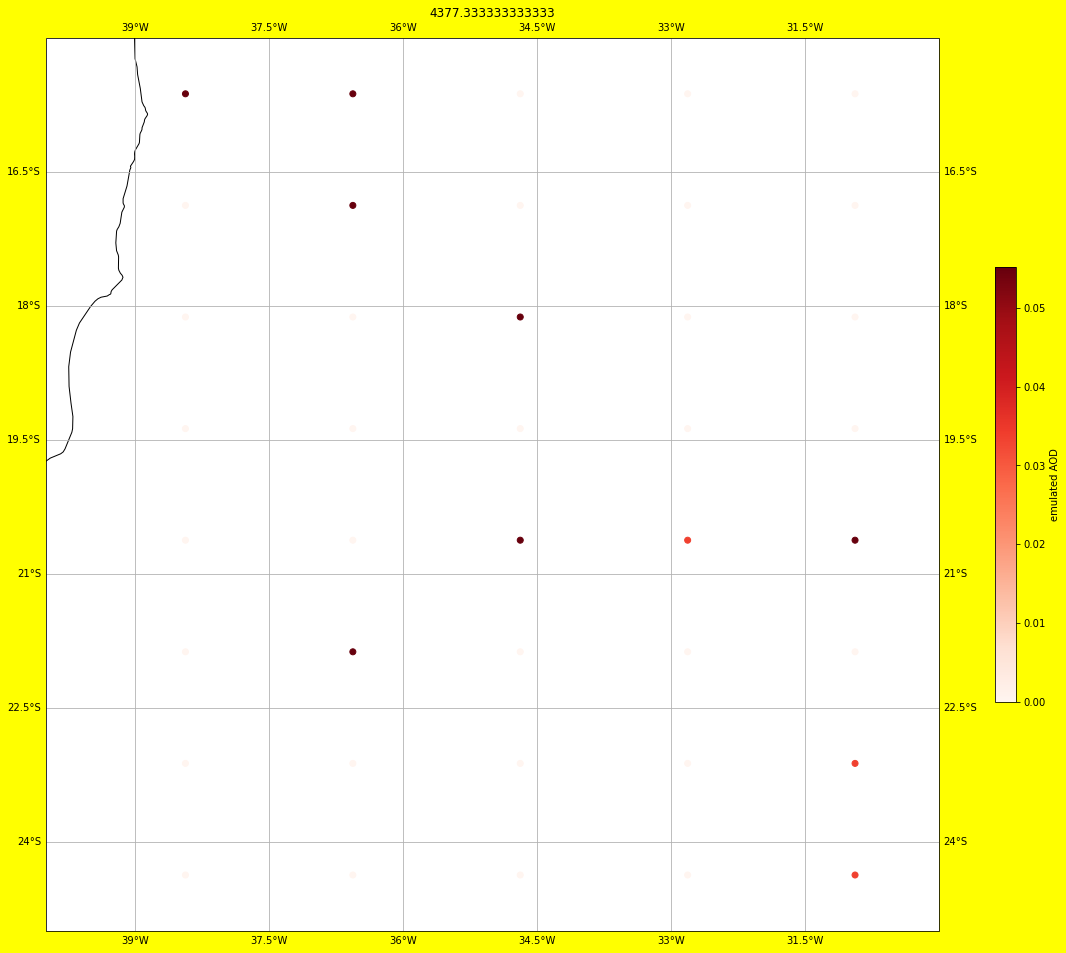

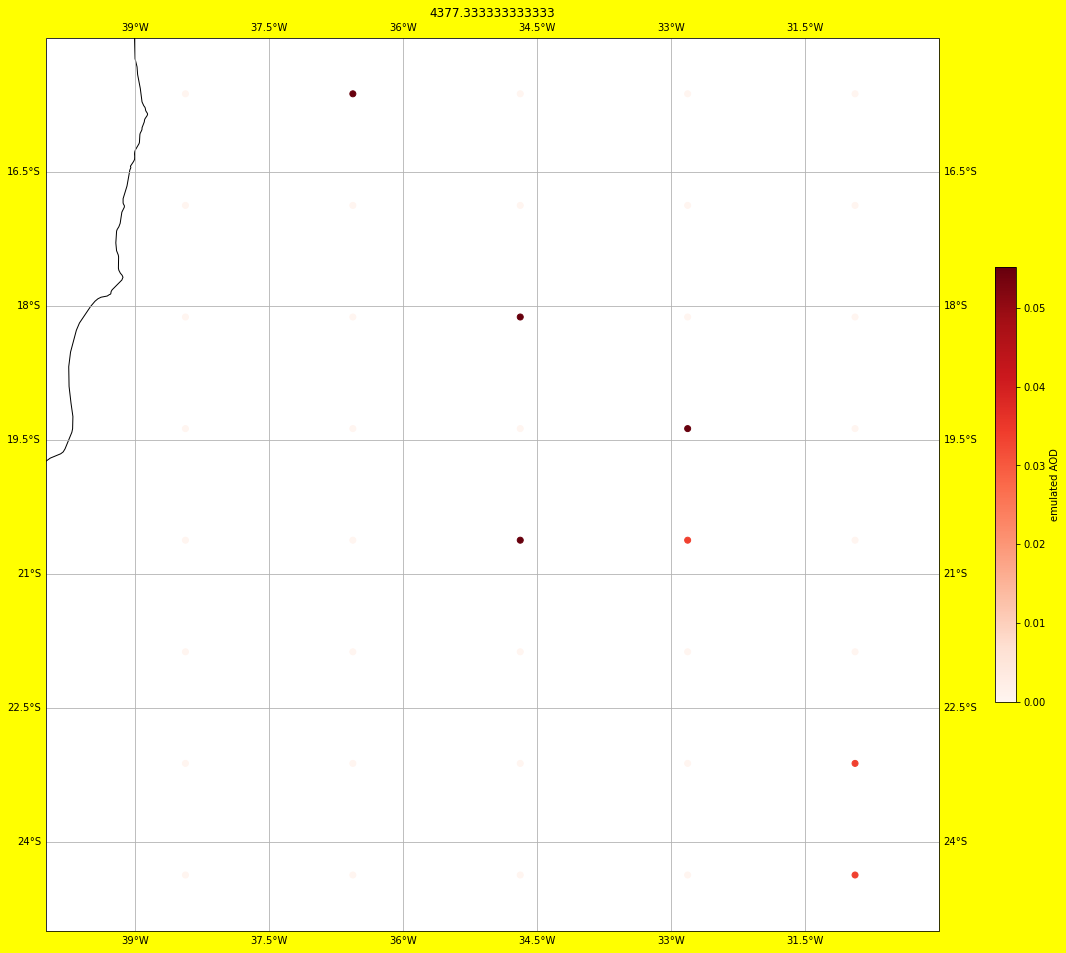

In [576]:
a.plot_variant(preds)

# Observe

We collect the satellite observations.

In [114]:
c = Observer(a)

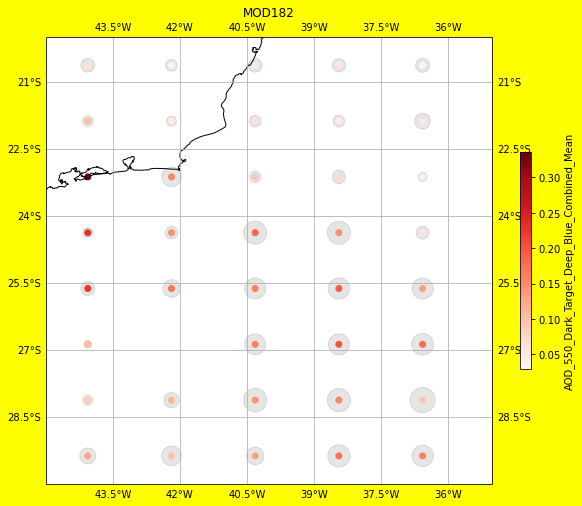

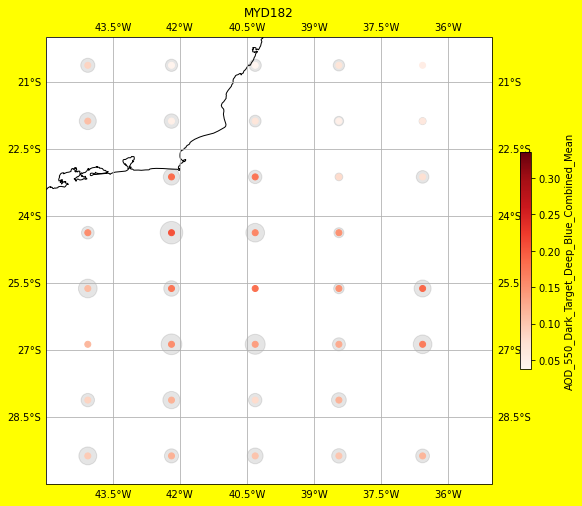

In [115]:
c.plot_observations()

# Invert

## Part I

First we measure the implausibility of various random points in the hypercube.

In [131]:
d = Statistician(a, b, c, pixelwise=False)

In [117]:
d.observations

,latitude,longitude,time,meanResponse,sdResponse
0,-29.375,-44.0625,4377.333333,0.127,0.026
1,-28.125,-44.0625,4377.333333,0.086,0.010
2,-26.875,-44.0625,4377.333333,0.106,0.006
3,-25.625,-44.0625,4377.333333,0.224,0.020
4,-24.375,-44.0625,4377.333333,0.231,0.011
...,...,...,...,...,...
75,-25.625,-36.5625,4380.333333,0.188,0.029
76,-24.375,-36.5625,4380.333333,NaN,NaN
77,-23.125,-36.5625,4380.333333,0.074,0.016
78,-21.875,-36.5625,4380.333333,0.060,0.005


In [118]:
d.get_regional_emulations(regional_emulators_models, d.__get_random_model_variants__(nVariants=1)[0])

In [119]:
df = d.emulated.sort_values(['time', 'longitude', 'latitude'])
df

,latitude,longitude,time,acure_dry_dep_ait,acure_prim_so4_diam,acure_autoconv_exp_nd,acure_bvoc_soa,bparam,acure_sea_spray,acure_bl_nuc,...,dbsdtbs_turb_0,acure_dry_dep_acc,a_ent_1_rp,acure_ait_width,acure_dms,acure_cloud_ph,acure_carb_bb_diam,acure_bc_ri,meanResponse,sdResponse
0,-29.375,-44.0625,4401.333333,0.294689,0.453006,0.872141,0.606975,0.556439,0.547901,0.051877,...,0.094831,0.818917,0.342319,0.681979,0.715584,0.445956,0.623476,0.114399,0.236270,0.542525
1,-28.125,-44.0625,4401.333333,0.294689,0.453006,0.872141,0.606975,0.556439,0.547901,0.051877,...,0.094831,0.818917,0.342319,0.681979,0.715584,0.445956,0.623476,0.114399,0.204471,0.456354
2,-26.875,-44.0625,4401.333333,0.294689,0.453006,0.872141,0.606975,0.556439,0.547901,0.051877,...,0.094831,0.818917,0.342319,0.681979,0.715584,0.445956,0.623476,0.114399,0.163978,0.366128
3,-25.625,-44.0625,4401.333333,0.294689,0.453006,0.872141,0.606975,0.556439,0.547901,0.051877,...,0.094831,0.818917,0.342319,0.681979,0.715584,0.445956,0.623476,0.114399,0.145353,0.408985
4,-24.375,-44.0625,4401.333333,0.294689,0.453006,0.872141,0.606975,0.556439,0.547901,0.051877,...,0.094831,0.818917,0.342319,0.681979,0.715584,0.445956,0.623476,0.114399,0.142055,0.363830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-25.625,-36.5625,4404.333333,0.294689,0.453006,0.872141,0.606975,0.556439,0.547901,0.051877,...,0.094831,0.818917,0.342319,0.681979,0.715584,0.445956,0.623476,0.114399,0.142055,0.363830
76,-24.375,-36.5625,4404.333333,0.294689,0.453006,0.872141,0.606975,0.556439,0.547901,0.051877,...,0.094831,0.818917,0.342319,0.681979,0.715584,0.445956,0.623476,0.114399,0.239964,0.461443
77,-23.125,-36.5625,4404.333333,0.294689,0.453006,0.872141,0.606975,0.556439,0.547901,0.051877,...,0.094831,0.818917,0.342319,0.681979,0.715584,0.445956,0.623476,0.114399,0.200695,0.430050
78,-21.875,-36.5625,4404.333333,0.294689,0.453006,0.872141,0.606975,0.556439,0.547901,0.051877,...,0.094831,0.818917,0.342319,0.681979,0.715584,0.445956,0.623476,0.114399,0.200695,0.430050


In [123]:
S = np.diag(np.array(df['sdResponse']))
S

array([[0.54252536, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.45635379, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.36612831, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.43004956, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.43004956,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.51261547]])

In [124]:
y = np.array(df['meanResponse'])
y

array([0.2362698 , 0.20447051, 0.16397839, 0.14535282, 0.14205534,
       0.23996355, 0.20069507, 0.20721839, 0.2362698 , 0.20447051,
       0.16397839, 0.14535282, 0.14205533, 0.23996355, 0.20069507,
       0.20721839, 0.2362698 , 0.20447051, 0.16397839, 0.14535282,
       0.14205533, 0.23996355, 0.20069507, 0.20721839, 0.20447051,
       0.20447051, 0.14535282, 0.14205533, 0.23996355, 0.23996355,
       0.20069507, 0.20721839, 0.20447051, 0.16397839, 0.14535282,
       0.14205532, 0.23996355, 0.20069506, 0.20069507, 0.20721839,
       0.2362698 , 0.20447051, 0.16397839, 0.14535282, 0.14205519,
       0.23996355, 0.20069504, 0.20721839, 0.2362698 , 0.20447051,
       0.16397839, 0.14535282, 0.14205518, 0.23996355, 0.20069504,
       0.20721839, 0.2362698 , 0.20447051, 0.16397839, 0.14535282,
       0.14205518, 0.23996355, 0.20069504, 0.20721839, 0.20447051,
       0.20447051, 0.14535282, 0.14205518, 0.23996355, 0.23996355,
       0.20069504, 0.20721839, 0.20447051, 0.16397839, 0.14535

In [125]:
z = np.array(d.observations['meanResponse'])
print(z)
E = np.diag(np.array(d.observations['sdResponse']))
print(E)

[0.127      0.086      0.10600001 0.224      0.231      0.33600003
 0.10300001 0.066      0.098      0.11000001        nan 0.172
 0.142      0.158      0.044      0.034      0.13100001 0.142
 0.15900001 0.162      0.185      0.093      0.063      0.054
 0.17300001 0.156      0.201      0.19100001 0.14600001 0.071
 0.041      0.058      0.16000001 0.09500001 0.179      0.133
 0.058      0.042      0.054      0.029      0.096      0.087
 0.115      0.11100001 0.15400001        nan 0.108      0.087
 0.12100001 0.12       0.15300001 0.17500001 0.20500001 0.18200001
 0.047      0.04       0.10300001 0.079      0.13800001 0.18
 0.15900001 0.177      0.064      0.037      0.101      0.119
 0.126      0.148      0.15       0.078      0.046      0.067
 0.11700001        nan 0.16800001 0.18800001        nan 0.074
 0.06       0.052     ]
[[0.026 0.    0.    ... 0.    0.    0.   ]
 [0.    0.01  0.    ... 0.    0.    0.   ]
 [0.    0.    0.006 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.0

In [126]:
xf = np.nan_to_num(y - z)
np.transpose(xf)@xf

0.8612538788202431

In [127]:
np.transpose(xf)@np.linalg.inv(S + np.nan_to_num(E))@xf

1.776099742635193

In [ ]:
Mf = S + np.nan_to_num(E)

np.transpose(xf)@np.linalg.inv(Mf)@(xf)

In [132]:
results = d.compute_statistics(
    10,
    regional_emulators_models,
    variantsFromTraining=False
)

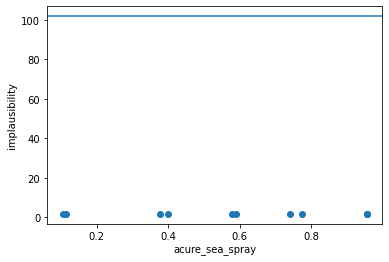

In [133]:
d.plot_statistics(results)

## Part II

Then we look at the training points and just toggle one parameter at a time. All variants appear implausible here!

acure_sea_spray
10


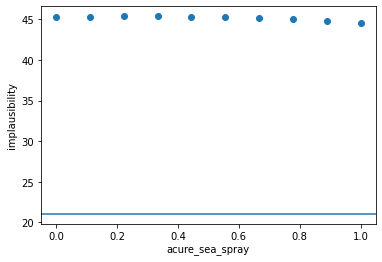

50


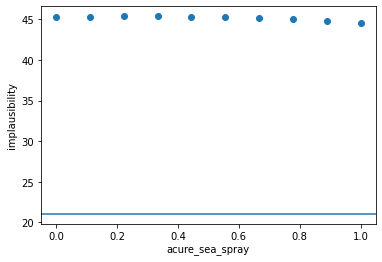

100


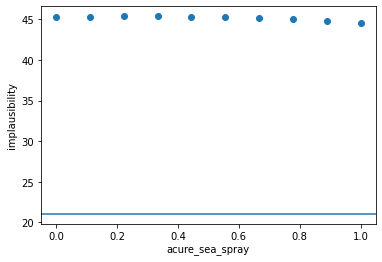

In [415]:
for param in ['acure_sea_spray']: #d.emulator.inputs:
    print(param)
    for point in [10, 50, 100]:
        print(point)

        results2 = d.compute_statistics(
            10,
            regional_emulators,
            b.lengthscales,
            b.labels,
            variantsFromTraining=True,
            whichParameter=param,
            whichPoint=point
        )

        d.plot_statistics(
            results2,
            whichParameter=param
        )

## Part III

Taking the most plausible variants from our earlier ensemble, let's just toggle sea spray in each one.

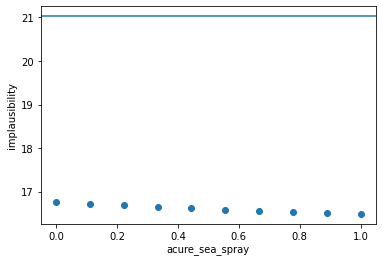

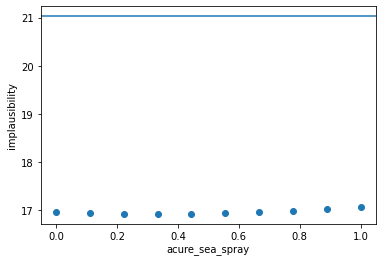

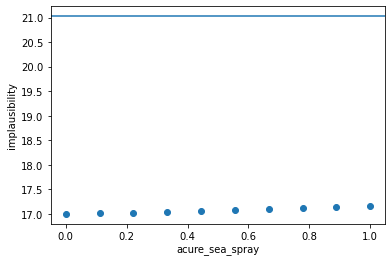

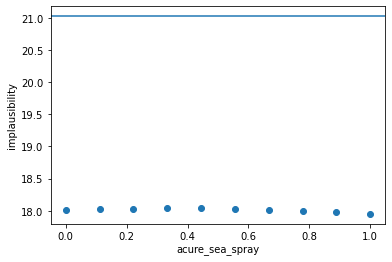

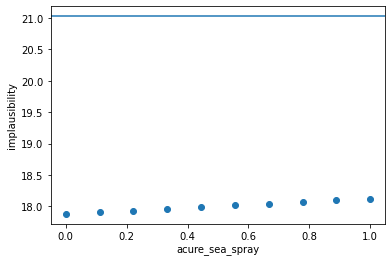

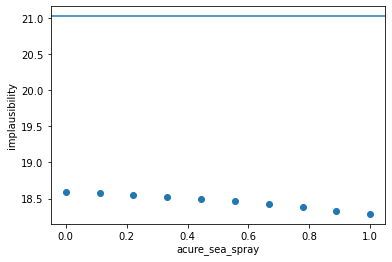

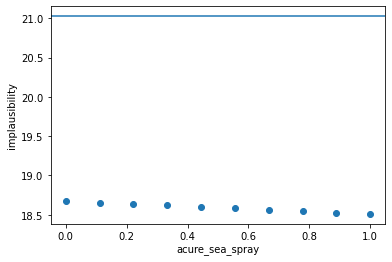

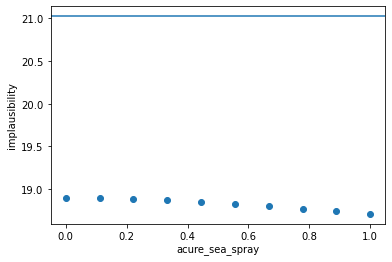

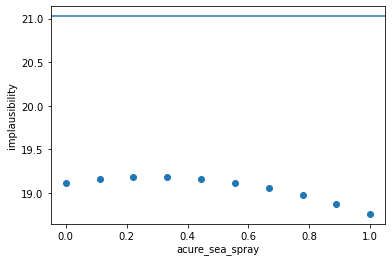

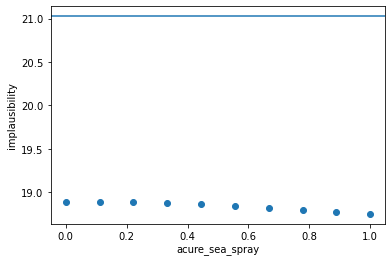

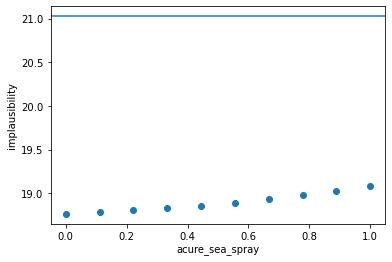

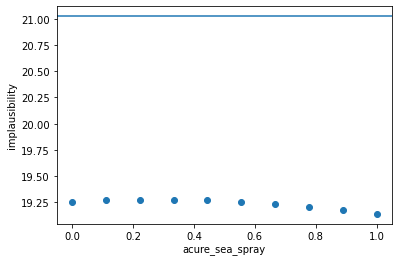

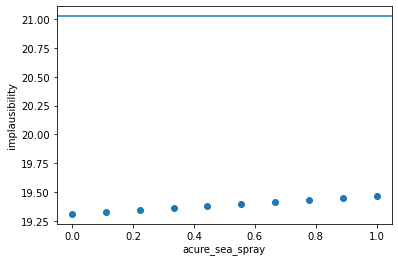

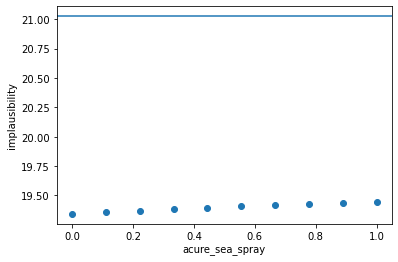

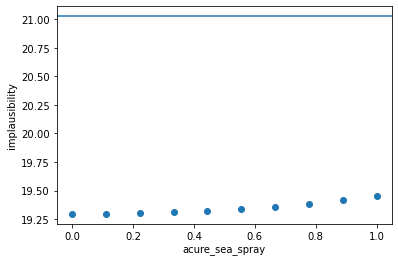

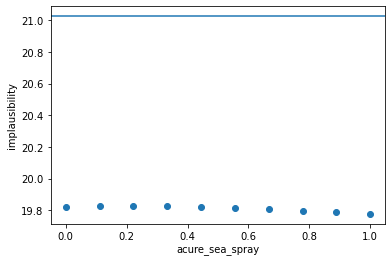

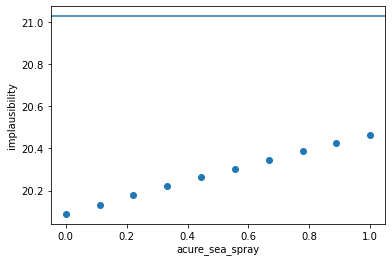

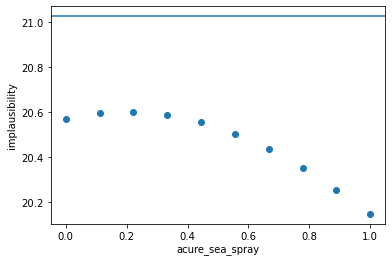

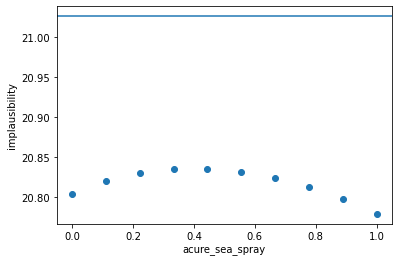

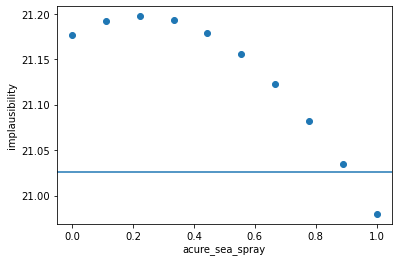

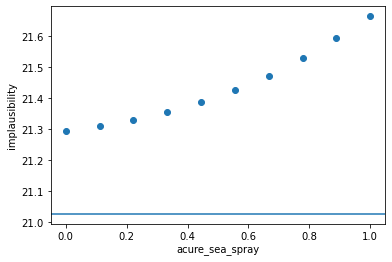

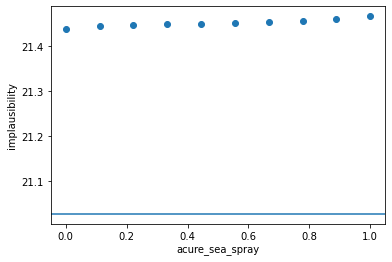

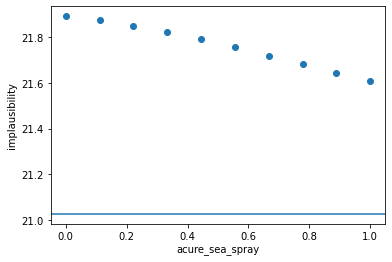

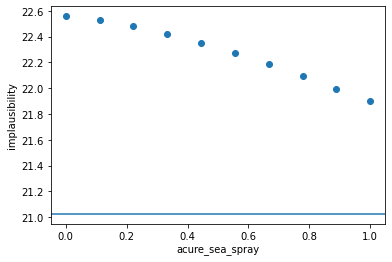

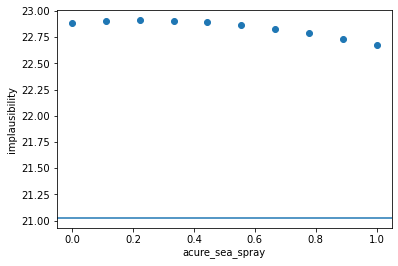

In [427]:
for idx in range(25):
    
    my_variant = results.sort_values('metric').reset_index(drop=True).loc[idx, :'acure_dry_dep_so2']
    
    model_variants = pd.concat([my_variant]*10, axis=1).transpose().reset_index(drop=True)
    model_variants.loc[:, 'acure_sea_spray'] = np.linspace(0, 1, 10)
    model_variants = model_variants.to_numpy().tolist()
    
    metrics = []

    for variant in model_variants:

        d.get_regional_emulations(regional_emulators, variant)

        regional_metrics = []

        for idx in cluster_idxs:
            my_y = d.y[idx]
            my_z = d.regional_mean_observations[idx]
            my_S = d.S[idx]
            my_e = np.diag(d.regional_sd_observations[idx])

            regional_metrics.append(np.sum(d.__mahalanobis_metric__(my_y, my_z, my_S, my_e)))

        metrics.append(sum(regional_metrics))

    results3 = pd.DataFrame(data=model_variants, columns=d.emulator.inputs)
    results3['metric'] = metrics
    
    d.plot_statistics(
        results3,
        whichParameter='acure_sea_spray'
    )

# In development

- Collect length scales
- Cluster them (in order given by length scale table)
- Store each region's grid points table separately
- Emulate each region idependently

In [248]:
d.observations

,latitude,longitude,time,meanResponse,sdResponse
0,-19.375,-38.4375,4377.333333,0.051,0.019
1,-18.125,-38.4375,4377.333333,0.039,0.013
2,-16.875,-38.4375,4377.333333,0.092,0.035
3,-15.625,-38.4375,4377.333333,0.098,0.004
4,-19.375,-36.5625,4377.333333,0.019,0.001
5,-18.125,-36.5625,4377.333333,0.029,0.009
6,-16.875,-36.5625,4377.333333,0.060,0.018
7,-15.625,-36.5625,4377.333333,0.070,0.017
8,-19.375,-34.6875,4377.333333,0.028,0.008
9,-18.125,-34.6875,4377.333333,0.050,0.018


In [249]:
b.lengthscales

,acure_bl_nuc,acure_ait_width,acure_cloud_ph,acure_carb_bb_diam,acure_prim_so4_diam,acure_sea_spray,acure_anth_so2_r,acure_bvoc_soa,acure_dms,acure_dry_dep_ait,...,acure_dry_dep_so2,acure_bc_ri,bparam,acure_autoconv_exp_nd,dbsdtbs_turb_0,a_ent_1_rp,modelId,latitude,longitude,time
0,48745.337252,100000.000000,100000.000000,11542.246305,40.761755,8.826803,43235.728217,4913.934005,64.171379,35220.635050,...,50.821734,4669.225028,60178.065956,52641.297048,19.495100,75880.876632,9da4df99-d0d0-47d9-ac90-e35a36c42204,-15.625,-30.9375,4377.333333
1,100000.000000,100000.000000,100000.000000,84246.804279,38.257474,8.111171,54375.180625,38518.907141,68.957638,52688.952484,...,50.497650,99913.166801,23213.117026,100000.000000,19.068176,100000.000000,1cd639b2-604b-460b-be55-eb5a1d9e8f57,-15.625,-30.9375,4380.333333
2,100000.000000,100000.000000,100000.000000,9431.223660,31.771128,10.272047,100000.000000,12280.749896,99.044451,36378.162521,...,84.919366,125.554067,17280.271118,4258.194152,141.010872,61.935533,20a4729a-1d07-42b5-b3e7-cf333efb530d,-15.625,-32.8125,4377.333333
3,37491.831943,41978.454610,52333.740146,24045.953607,322.438691,6.694810,82914.555896,23734.250174,123.260541,30050.628962,...,82.967026,1732.296092,205.014049,48.175723,158.180918,114.437363,cd9def5b-12d8-499a-93cb-844aff782e0d,-15.625,-32.8125,4380.333333
4,100000.000000,100000.000000,113.635643,100000.000000,24.315777,7.835607,41089.478969,83.040755,98.572730,100000.000000,...,63.276931,446.010832,100000.000000,100000.000000,100000.000000,138.405566,93155b19-e7bc-48ae-ab95-e5a5b390c571,-15.625,-34.6875,4377.333333
5,15742.971901,32768.750804,16808.841560,65.195177,24.660244,8.406634,15215.795548,368.091404,82.013867,28200.549472,...,79.335535,110.117884,305.421424,100000.000000,50877.566735,70.153078,c0114097-b927-4d61-b848-6d091a1b9e31,-15.625,-34.6875,4380.333333
6,1002.723287,7421.975629,7744.544641,6.599770,7.335762,2.093311,725.827724,2740.059187,21.708386,45.167251,...,14.218027,23.207227,5999.894046,967.239570,11807.461046,18.967105,a47c44f8-91ec-43a3-bc5f-8aebb8825ebe,-15.625,-36.5625,4377.333333
7,5025.528663,53838.025871,100000.000000,11.299855,8.606788,2.272425,100000.000000,43185.358418,20.021899,32.828236,...,9.150520,100000.000000,432.285985,2015.005600,100000.000000,18.811537,0334c83a-1503-495c-868e-eb3454e87d7c,-15.625,-36.5625,4380.333333
8,41.721386,4284.572008,9.477428,12244.817427,7.023740,2.079903,8897.817322,18.677196,21.165354,46.189148,...,16.410348,6585.261999,6.866055,40.377128,5664.497429,10.980266,5aef1925-8505-4ca7-8c5c-293cbfb71c1f,-15.625,-38.4375,4377.333333
9,14836.802031,100000.000000,11.705614,71.838291,6.263951,2.932435,83036.495474,62135.516231,19.667150,27.844201,...,21.421820,32196.862411,100000.000000,11.820815,100000.000000,100000.000000,60000994-9b80-44b9-91b5-ec307872021b,-15.625,-38.4375,4380.333333
